Imports

In [2]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools import mask as mask_util
import os

Loading annotations:

In [3]:
train_ann = "../dataset/train/_annotations.coco.json"
coco = COCO(train_ann)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


Let's inspect the images: 

In [5]:
print("Number of Images: ", len(coco.imgs))
list(coco.imgs.values())[:3]

Number of Images:  1502


[{'id': 0,
  'license': 1,
  'file_name': '2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'},
 {'id': 1,
  'license': 1,
  'file_name': '2871_jpg.rf.3b6eadfbb369abc2b3bcb52b406b74f2.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'},
 {'id': 2,
  'license': 1,
  'file_name': '2921_jpg.rf.3b952f91f27a6248091e7601c22323ad.jpg',
  'height': 640,
  'width': 640,
  'date_captured': '2023-08-19T04:37:54+00:00'}]

Let's Inspect annotations:

In [6]:
print("Number of annotations: ", len(coco.anns))
list(coco.anns.values())[:3]

Number of annotations:  1502


[{'id': 0,
  'image_id': 0,
  'category_id': 1,
  'bbox': [145, 239, 168.75, 162.5],
  'area': 27421.875,
  'segmentation': [[313.75,
    238.75,
    145,
    238.75,
    145,
    401.25,
    313.75,
    401.25,
    313.75,
    238.75]],
  'iscrowd': 0},
 {'id': 1,
  'image_id': 1,
  'category_id': 1,
  'bbox': [194, 176, 148.75, 233.75],
  'area': 34770.313,
  'segmentation': [[342.5,
    176.25,
    193.75,
    176.25,
    193.75,
    410,
    342.5,
    410,
    342.5,
    176.25]],
  'iscrowd': 0},
 {'id': 2,
  'image_id': 2,
  'category_id': 1,
  'bbox': [133, 173, 162.5, 185],
  'area': 30062.5,
  'segmentation': [[295,
    172.5,
    132.5,
    172.5,
    132.5,
    357.5,
    295,
    357.5,
    295,
    172.5]],
  'iscrowd': 0}]

Let's Vizualize 1 image:

In [7]:
sample_img_id = list(coco.imgs.keys())[0]
img_info = coco.imgs[sample_img_id]
img_info

{'id': 0,
 'license': 1,
 'file_name': '2256_jpg.rf.3afd7903eaf3f3c5aa8da4bbb928bc19.jpg',
 'height': 640,
 'width': 640,
 'date_captured': '2023-08-19T04:37:54+00:00'}

Let's Load image from Disk:

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

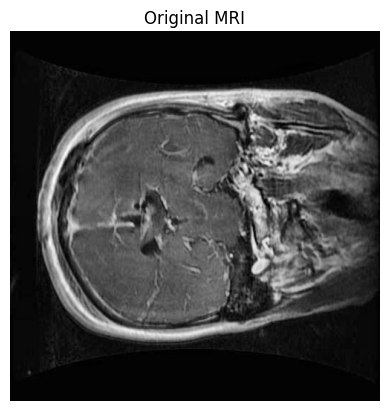

In [8]:
img_path = os.path.join("../dataset/train", img_info["file_name"])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Original MRI")
plt.axis("off")

Let's load all the Polygons for the image above:

In [9]:
ann_ids = coco.getAnnIds(imgIds=sample_img_id)
anns = coco.loadAnns(ann_ids)

anns

[{'id': 0,
  'image_id': 0,
  'category_id': 1,
  'bbox': [145, 239, 168.75, 162.5],
  'area': 27421.875,
  'segmentation': [[313.75,
    238.75,
    145,
    238.75,
    145,
    401.25,
    313.75,
    401.25,
    313.75,
    238.75]],
  'iscrowd': 0}]

Vizualiza images on polygon:

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

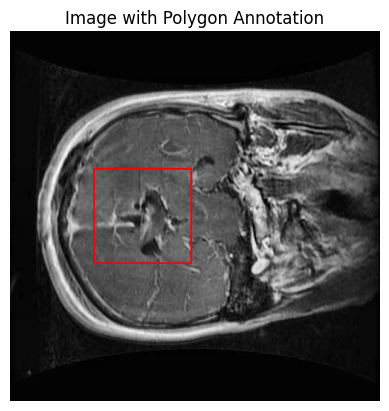

In [11]:
img_copy = img.copy()

for ann in anns: 
    for seg in ann["segmentation"]:
        pts = np.array(seg).reshape(-1, 2).astype(int)
        cv2.polylines(img_copy, [pts], isClosed=True, color=(255,0,0),thickness=2)
        
plt.imshow(img_copy)
plt.title("Image with Polygon Annotation")
plt.axis("off")

Convert Polygons --> Binary Mask:

In [ ]:
height = img_info["height"]
width = img_info["width"]

mask = np.zeros((height, width), dtype=np.uint8)

for ann in anns:
    rles = mask_util.frPyObjects(ann["segmentation"], height, width)
    rle = mask_util.merge(rles)
    m = mask_util.decode(rle)
    mask = np.maximum(mask, m) #merge all polygons
    
# We now have a binary mask with shape [H, W].

Visualize the Mask:

(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

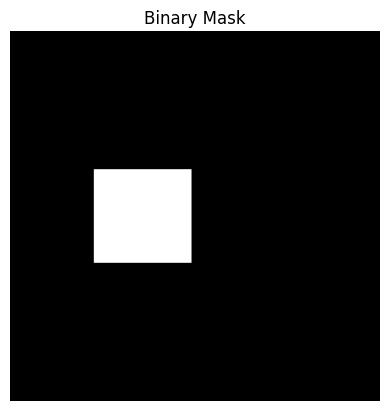

In [14]:
plt.imshow(mask, cmap='gray')
plt.title("Binary Mask")
plt.axis("off")

Overlay Mask on MRI

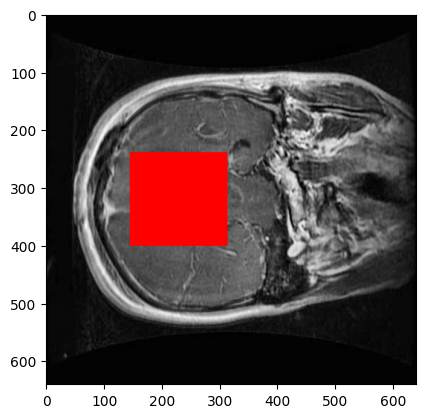

In [ ]:
overlay = img.copy()
overlay[mask == 1] = [255, 0, 0] #red overlay

plt.imshow(overlay)
plt.title("MRI with Mask Overlay")
plt.axis("off")